In [49]:
import pandas as pd
import numpy as np
import os

import csv
import json
import sys

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline 

In [50]:
print 'READ IN DATA'
# set the data path
data_directory = '../data/'

data_directory = '../data/'
data_directory = os.path.join('..' ,'data')

authors = pd.read_csv(os.path.join(data_directory,'accounts.csv'))

print os.path.join(data_directory,'accounts.csv')
authors = pd.read_csv(os.path.join(data_directory,'accounts.csv'))
posts_raw_cleaned = pd.read_csv(os.path.join(data_directory,
                                             'posts_raw_cleaned',
                                             'posts_raw_cleaned.csv'))

READ IN DATA
../data/accounts.csv


In [51]:
print posts_raw_cleaned.columns

Index([u'ID', u'author', u'permlink', u'category', u'last_update', u'created',
       u'active', u'last_payout', u'depth', u'children', u'children_rshares2',
       u'net_rshares', u'abs_rshares', u'vote_rshares',
       u'children_abs_rshares', u'cashout_time', u'max_cashout_time',
       u'total_vote_weight', u'reward_weight', u'total_payout_value',
       u'curator_payout_value', u'author_rewards', u'net_votes',
       u'root_comment', u'mode', u'max_accepted_payout',
       u'percent_steem_dollars', u'allow_replies', u'allow_votes',
       u'allow_curation_rewards', u'url', u'root_title',
       u'pending_payout_value', u'total_pending_payout_value', u'active_votes',
       u'replies', u'author_reputation', u'body_language', u'dirty', u'ID.1',
       u'tx_id', u'author.1', u'permlink.1', u'parent_author',
       u'parent_permlink', u'title', u'json_metadata', u'body', u'body urls',
       u'number of body urls', u'number of youtube urls',
       u'number of image urls', u'body tags

In [52]:
df_timeseries = posts_raw_cleaned

In [53]:
# create counts for all tags
def createtag_count(x):
    count = 0
    if type(x) == str:
        try:
            j = json.loads(x)
            if 'tags' not in j:
                return 0
            tags = j['tags']
            count = len(tags)
        except Exception as e: 
            print "exception:", e
    return count

# create a column that has a list for each one
def tags(x):
    tags = 'EMPTY'
    if type(x) == str:
        try:
            j = json.loads(x)
            if 'tags' not in j:
                return 'EMPTY'
            tags = j['tags']
        except Exception as e: 
            print "exception:", e
    return tags 

In [54]:
df_timeseries['tags_count'] = posts_raw_cleaned.apply(lambda x: createtag_count(x['json_metadata']), axis=1)
df_timeseries['tags'] = posts_raw_cleaned.apply(lambda x: tags(x['json_metadata']), axis=1)

# change the date columns to be a timeseries object
df_timeseries['created'] = pd.to_datetime(df_timeseries['created'], format='%Y-%m-%d')


# return only the date, chopping off the time
df_timeseries['date_final'] = posts_raw_cleaned.apply(lambda row: row['created'].date(), axis=1)
# creating month year columns
df_timeseries['yearmonth_final'] = df_timeseries['date_final'].map(lambda x: str(x.year) + '-'+ str(x.month))


In [55]:
print df_timeseries['date_final'].min()
print df_timeseries['date_final'].max()
#[0,1,0,0,0,0,1,1,0,0,0,...]

2016-03-30
2017-02-19


In [56]:
# create a sorted timeseries column called X
X = df_timeseries.sort('date_final')

/Users/laurenmccarthy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [57]:
X.columns

Index([u'ID', u'author', u'permlink', u'category', u'last_update', u'created',
       u'active', u'last_payout', u'depth', u'children', u'children_rshares2',
       u'net_rshares', u'abs_rshares', u'vote_rshares',
       u'children_abs_rshares', u'cashout_time', u'max_cashout_time',
       u'total_vote_weight', u'reward_weight', u'total_payout_value',
       u'curator_payout_value', u'author_rewards', u'net_votes',
       u'root_comment', u'mode', u'max_accepted_payout',
       u'percent_steem_dollars', u'allow_replies', u'allow_votes',
       u'allow_curation_rewards', u'url', u'root_title',
       u'pending_payout_value', u'total_pending_payout_value', u'active_votes',
       u'replies', u'author_reputation', u'body_language', u'dirty', u'ID.1',
       u'tx_id', u'author.1', u'permlink.1', u'parent_author',
       u'parent_permlink', u'title', u'json_metadata', u'body', u'body urls',
       u'number of body urls', u'number of youtube urls',
       u'number of image urls', u'body tags

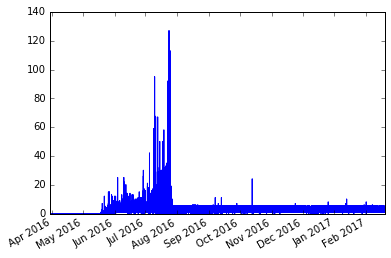

In [58]:
plt.plot(X['date_final'], X['tags_count']) # plot all points as a scatter plot
plt.gcf().autofmt_xdate()
plt.show()

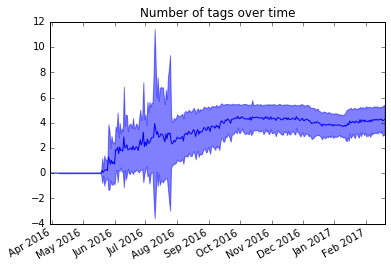

In [59]:
Y = X.groupby(['date_final'])['tags_count'].mean()
std = X.groupby(['date_final'])['tags_count'].std()
plt.plot_date(Y.index, Y, '-')
plt.fill_between(Y.index, (Y - std).tolist(), (Y + std).tolist(), alpha=0.5, color='b')
plt.gcf().autofmt_xdate()
plt.title('Number of tags over time')
plt.show()

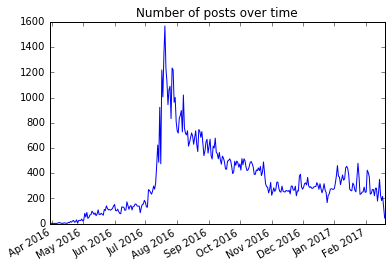

In [60]:
Y2 = X.groupby(['date_final']).size()
#std = X.groupby(['date_final'])['tags_count'].std()
plt.plot_date(Y2.index, Y2, '-')
#plt.fill_between(Y.index, (Y - std).tolist(), (Y + std).tolist(), alpha=0.5, color='b')
plt.gcf().autofmt_xdate()
plt.title('Number of posts over time')
plt.show()

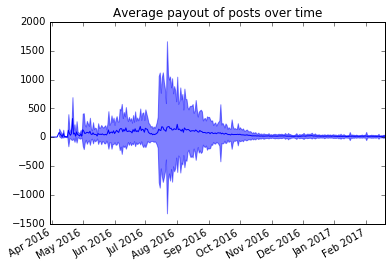

In [61]:
Y3 = X.groupby(['date_final'])['total_payout_value'].mean()
std = X.groupby(['date_final'])['total_payout_value'].std()
plt.plot_date(Y3.index, Y3, '-')
plt.fill_between(Y3.index, (Y3 - std).tolist(), (Y3 + std).tolist(), alpha=0.5, color='b')
plt.gcf().autofmt_xdate()
plt.title('Average payout of posts over time')
plt.show()

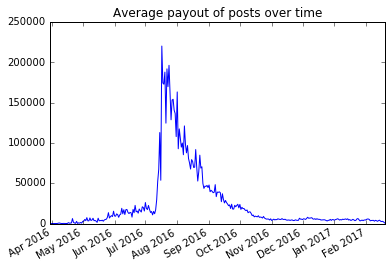

In [62]:
Y3 = X.groupby(['date_final'])['total_payout_value'].sum()
#std = X.groupby(['date_final'])['total_payout_value'].std()
plt.plot_date(Y3.index, Y3, '-')
#plt.fill_between(Y3.index, (Y3 - std).tolist(), (Y3 + std).tolist(), alpha=0.5, color='b')
plt.gcf().autofmt_xdate()
plt.title('Average payout of posts over time')
plt.show()

In [63]:
X[['author', 'date_final', 'total_payout_value']]

,author,date_final,total_payout_value
90705,steemit,2016-03-30,0.94
88227,proskynneo,2016-03-31,1.06
89108,red,2016-04-06,1.02
9472,datasecuritynode,2016-04-08,130.90
7920,dele-puppy,2016-04-08,169.77
12485,wackou,2016-04-08,81.77
106765,abit,2016-04-08,0.48
10486,abit,2016-04-08,110.73
78471,lafona,2016-04-08,1.85
9630,xeldal,2016-04-08,127.72


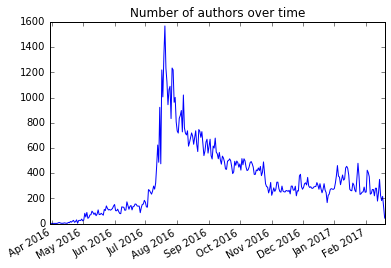

In [64]:
Y4 = X.groupby(['date_final'])['author'].count()
#std = X.groupby(['date_final'])['total_payout_value'].std()
plt.plot_date(Y4.index, Y4, '-')
#plt.fill_between(Y3.index, (Y3 - std).tolist(), (Y3 + std).tolist(), alpha=0.5, color='b')
plt.gcf().autofmt_xdate()
plt.title('Number of authors over time')
plt.show()

In [65]:
Y4

date_final
2016-03-30      1
2016-03-31      1
2016-04-06      1
2016-04-08      8
2016-04-10      2
2016-04-11      2
2016-04-12      2
2016-04-13      5
2016-04-15      2
2016-04-16      2
2016-04-17      9
2016-04-18      6
2016-04-19     16
2016-04-20     11
2016-04-21     19
2016-04-22     25
2016-04-23     10
2016-04-24     15
2016-04-25     29
2016-04-26      2
2016-04-27     24
2016-04-28     25
2016-04-29     24
2016-04-30     35
2016-05-01     21
2016-05-02     28
2016-05-03     81
2016-05-04     52
2016-05-05     88
2016-05-06     41
             ... 
2017-01-21    264
2017-01-22    251
2017-01-23    369
2017-01-24    478
2017-01-25    376
2017-01-26    231
2017-01-27    236
2017-01-28    249
2017-01-29    251
2017-01-30    289
2017-01-31    248
2017-02-01    250
2017-02-02    423
2017-02-03    405
2017-02-04    371
2017-02-05    233
2017-02-06    239
2017-02-07    270
2017-02-08    270
2017-02-09    220
2017-02-10    280
2017-02-11    280
2017-02-12    178
2017-02-13    245

In [66]:
Y2

date_final
2016-03-30      1
2016-03-31      1
2016-04-06      1
2016-04-08      8
2016-04-10      2
2016-04-11      2
2016-04-12      2
2016-04-13      5
2016-04-15      2
2016-04-16      2
2016-04-17      9
2016-04-18      6
2016-04-19     16
2016-04-20     11
2016-04-21     19
2016-04-22     25
2016-04-23     10
2016-04-24     15
2016-04-25     29
2016-04-26      2
2016-04-27     24
2016-04-28     25
2016-04-29     24
2016-04-30     35
2016-05-01     21
2016-05-02     28
2016-05-03     81
2016-05-04     52
2016-05-05     88
2016-05-06     41
             ... 
2017-01-21    264
2017-01-22    251
2017-01-23    369
2017-01-24    478
2017-01-25    376
2017-01-26    231
2017-01-27    236
2017-01-28    249
2017-01-29    251
2017-01-30    289
2017-01-31    248
2017-02-01    250
2017-02-02    423
2017-02-03    405
2017-02-04    371
2017-02-05    233
2017-02-06    239
2017-02-07    270
2017-02-08    270
2017-02-09    220
2017-02-10    280
2017-02-11    280
2017-02-12    178
2017-02-13    245

## Read in data structures around counts, and date counts

In [67]:
path = '/Users/laurenmccarthy/Documents/Columbia/Capstone/DSI_Capstone_Steemit/data/timeseries/'

with open(path+'datecount.json', 'r') as fp:
    datecount = json.load(fp)

with open(path+'tagscountdict.json', 'r') as fp:
    tagscountdict = json.load(fp)
    

with open(path+'trending.json', 'r') as fp:
    trending = json.load(fp)

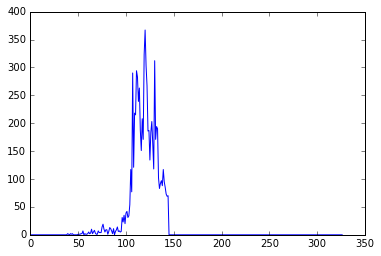

past 3 days average: 9.66666666667


In [110]:
#try one example
from datetime import datetime
from datetime import timedelta
# outside loop for all the tags

date2idx = {}
idx = 0
t=df_timeseries['date_final'].min()
while t < df_timeseries['date_final'].max():
    s = datetime.strftime(t, "%Y-%m-%d")
    date2idx[s] = idx
    t += timedelta(days=1)
    idx += 1
s = datetime.strftime(t, "%Y-%m-%d")
date2idx[s] = idx

brexit_tags_count = np.zeros(idx+1)
for s, count in trending['steemit'].iteritems():
    idx = date2idx[s]
    brexit_tags_count[idx] = count

plt.plot(brexit_tags_count)
plt.show()

d = "2016-06-30"
i = date2idx[d]
print "past 3 days average:", brexit_tags_count[i-3:i].mean()
#my_dict['brexit'][i-3:i]

In [71]:
dftimeseries = df_timeseries.head(100)

In [108]:
from datetime import timedelta
from datetime import datetime

all_tags_count = {}
for key in trending.keys():
    date2idx = {}
    idx = 0
    t=df_timeseries['date_final'].min()
    while t < df_timeseries['date_final'].max():
        s = datetime.strftime(t, "%Y-%m-%d")
        date2idx[s] = idx
        t += timedelta(days=1)
        idx += 1
    s = datetime.strftime(t, "%Y-%m-%d")
    date2idx[s] = idx

    current_tags_count = np.zeros(idx+1)
    #print current_tags_count.shape
    for s, count in trending[key].iteritems():
        #print s, count
        idx = date2idx[s]
        #print idx
        current_tags_count[idx] = count
    all_tags_count[key] = current_tags_count

#plt.plot(brexit_tags_count)
#plt.show()

#d = "2016-06-30"
#i = date2idx[d]
#print "past 3 days average:", brexit_tags_count[i-3:i].mean()


#my_dict['brexit'][i-3:i]



In [ ]:
trending_score = []
for index, row in df_timeseries.iterrows():
    d = str(row['date_final'])
    print d
    i = date2idx[d]
    tag = row['category']
    print tag
    try:
        val = all_tags_count[tag][i-3:i].mean()
        print val
    except:
        val = 0
    trending_score.append(val) 

In [109]:
type(all_tags_count)

dict

In [98]:
date2idx

{'2016-03-30': 0,
 '2016-03-31': 1,
 '2016-04-01': 2,
 '2016-04-02': 3,
 '2016-04-03': 4,
 '2016-04-04': 5,
 '2016-04-05': 6,
 '2016-04-06': 7,
 '2016-04-07': 8,
 '2016-04-08': 9,
 '2016-04-09': 10,
 '2016-04-10': 11,
 '2016-04-11': 12,
 '2016-04-12': 13,
 '2016-04-13': 14,
 '2016-04-14': 15,
 '2016-04-15': 16,
 '2016-04-16': 17,
 '2016-04-17': 18,
 '2016-04-18': 19,
 '2016-04-19': 20,
 '2016-04-20': 21,
 '2016-04-21': 22,
 '2016-04-22': 23,
 '2016-04-23': 24,
 '2016-04-24': 25,
 '2016-04-25': 26,
 '2016-04-26': 27,
 '2016-04-27': 28,
 '2016-04-28': 29,
 '2016-04-29': 30,
 '2016-04-30': 31,
 '2016-05-01': 32,
 '2016-05-02': 33,
 '2016-05-03': 34,
 '2016-05-04': 35,
 '2016-05-05': 36,
 '2016-05-06': 37,
 '2016-05-07': 38,
 '2016-05-08': 39,
 '2016-05-09': 40,
 '2016-05-10': 41,
 '2016-05-11': 42,
 '2016-05-12': 43,
 '2016-05-13': 44,
 '2016-05-14': 45,
 '2016-05-15': 46,
 '2016-05-16': 47,
 '2016-05-17': 48,
 '2016-05-18': 49,
 '2016-05-19': 50,
 '2016-05-20': 51,
 '2016-05-21': 52,
 '2

In [104]:
trending_score = []
print type(df_timeseries)
for index, row in dftimeseries.iterrows():
    d = str(row['date_final'])
    print d
    i = date2idx[d]
    tag = row['category']
    print tag
    try:
        val = all_tags_count[tag][i-3:i].mean()
        print val
    except:
        val = 0
    trending_score.append(val)    


<class 'pandas.core.frame.DataFrame'>
2016-07-22
piston
0.333333333333
2016-07-15
beauty
0.0
2016-07-27
steemit
176.666666667
2016-07-25
money
28.6666666667
2016-07-19
steem
69.0
2016-07-14
introduceyourself
60.6666666667
2016-07-23
introduceyourself
85.0
2016-07-29
photography
64.3333333333
2016-08-04
introduceyourself
39.0
2016-07-22
steemit
272.0
2016-07-24
steem
83.0
2016-07-26
steemit
182.0
2016-08-05
introduceyourself
42.6666666667
2016-07-18
news
15.0
2016-08-08
introduceyourself
67.0
2016-07-20
anarchism
6.0
2016-07-25
introduceyourself
97.6666666667
2016-07-17
marketing
2.66666666667
2016-08-04
introduceyourself
39.0
2016-07-18
steemit
209.666666667
2016-07-17
travel
16.3333333333
2016-09-12
steemfest
2016-08-10
steemit
225.666666667
2016-07-30
introduceyourself
88.6666666667
2016-07-19
introduceyourself
76.0
2016-07-18
steemit
209.666666667
2016-08-06
introduceyourself
65.0
2016-07-18
steem
81.6666666667
2016-07-20
steemit
242.333333333
2016-07-21
github
0.0
2016-07-28
steem


In [111]:
dftimeseries['trending_score'] = trending_score

/Users/laurenmccarthy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [88]:
all_tags_count[dftimeseries['category'][0]]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   0.,   0.,   0.,
         0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
         2.,   1.,   0.,   0.,  59.,  26.,   0.,   0.,   1.,   0.,   1.,
         1.,   0.,   1.,   2.,   0.,   0.,   6.,   0.,   0.,   0.,   2.,
         0.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

'piston'

In [77]:
dftimeseries

,ID,author,permlink,category,last_update,created,active,last_payout,depth,children,...,number of youtube urls,number of image urls,body tags,number of body tags,body mentions,number of body mentions,tags_count,tags,date_final,yearmonth_final
0,200491,xeroc,piston-web-first-open-source-steem-gui---searc...,piston,2016-07-23 12:19:12,2016-07-22 16:14:09,2016-08-23 12:59:18,2016-08-24 14:49:30,0,369,...,0,6,"@@ -3796,8 +3796,268 @@ a look. + # Update ...",8,[],0,0,EMPTY,2016-07-22,2016-7
1,91489,guerrint,the-first-steemit-makeup-turtorial-bringing-yo...,beauty,2016-07-16 00:07:51,2016-07-15 22:06:54,2016-08-12 04:31:27,2016-08-23 23:35:30,0,227,...,4,4,"@@ -481,12 +481,11 @@ you -guys +all wil @...",42,[],0,1,[beauty],2016-07-15,2016-7
2,287772,cass,steemit-chat-foss-alternative-to-slack-deploye...,steemit,2016-07-27 09:47:24,2016-07-27 09:47:24,2016-08-06 10:28:51,2016-08-27 00:34:12,0,145,...,0,4,[![web-landing](https://www.steemimg.com/image...,5,[riverhead],1,4,"[steemit, steemit-community, steem, chat]",2016-07-27,2016-7
3,254654,steemdrive,sa-s-city-of-durban-to-be-engulfed-by-steem-th...,money,2016-07-26 00:02:39,2016-07-25 17:43:33,2016-08-17 18:01:18,2016-08-26 00:02:00,0,263,...,2,20,The worlds first Super Spectacular Advertisi...,12,"[steemdrive), steemdrive](http://www.steemit.c...",61,41,"[money, cryptotrading, business, crypto, finte...",2016-07-25,2016-7
4,146210,infovore,how-steemit-has-changed-my-life-from-living-on...,steem,2016-07-20 01:18:06,2016-07-19 22:01:09,2016-08-21 20:34:39,2016-08-24 14:03:03,0,489,...,0,5,"@@ -166,16 +166,89 @@ erall. +(Lol. I'm an ...",10,"[stellabelle's, donkeypong, stellabelle, cryto...",7,7,"[steem, , introduceyourself, steemit, bitcoin,...",2016-07-19,2016-7
5,81125,jl777,steemit-is-crypto-s-first-mass-market-solution,introduceyourself,2016-07-14 16:32:48,2016-07-14 16:32:48,2016-07-21 12:01:51,2016-08-23 05:21:30,0,66,...,0,0,I am jl777 and for the last few years I have b...,0,[],0,8,"[introduceyourself, blockchain, bitcoin, netwo...",2016-07-14,2016-7
6,217220,allasyummyfood,7dek2o-hello-steemit-my-name-is-alla-i-am-a-yo...,introduceyourself,2016-07-23 18:27:27,2016-07-23 16:11:45,2016-08-10 10:37:00,2016-08-23 21:05:57,0,455,...,0,22,"@@ -3319,24 +3319,19 @@ pg</p> < -p> +h2> I ...",0,"[Cryptoctopus, rok-sivante's, wingz, Cryptocto...",6,1,[introduceyourself],2016-07-23,2016-7
7,331546,manthostsakirid,the-first-steemit-professional-photoshooting-b...,photography,2016-07-29 11:47:27,2016-07-29 10:15:45,2016-08-14 21:00:51,2016-08-29 09:07:39,0,157,...,1,23,Hello Steemians...Manthos again... Photograph...,4,[steemychicken1],1,5,"[photography, steemit, girls, fashion, ]",2016-07-29,2016-7
8,452387,dollarvigilante,the-dollar-vigilante-is-now-on-steemit,introduceyourself,2016-08-04 22:26:12,2016-08-04 21:56:36,2016-09-02 20:56:06,2016-09-04 14:23:42,0,257,...,1,0,"@@ -112,16 +112,20 @@ .jpg"" /> + <p> My name...",0,[],0,2,"[introduceyourself, helloworld]",2016-08-04,2016-8
9,206465,guerrint,steemit-in-the-streets-tara-gets-interviews-an...,steemit,2016-07-22 23:24:30,2016-07-22 23:02:33,2016-08-04 09:37:45,2016-08-25 13:25:30,0,198,...,1,1,"@@ -743,8 +743,20 @@ irlpower + #doyourpart @...",11,[],0,1,[steemit],2016-07-22,2016-7


In [ ]:
dates = datecount.keys()
dates

In [ ]:
top_30_tags = dict(Counter(tagscountdict).most_common(30))

In [ ]:
#sorted(top_30_tags.iteritems(), key=operator.itemgetter(1))

plt.bar(range(len(top_30_tags)), top_30_tags.values())
plt.xticks(range(len(top_30_tags)), top_30_tags.keys(), rotation='vertical')

plt.tight_layout()

In [ ]:
df = pd.DataFrame(datecount)

In [ ]:
date = datecount.keys()
print date

first_name = []
second_name = []
third_name = []
fourth_name = []
fifth_name = []

first_vals = []
second_vals = []
third_vals = []
fourth_vals = []
fifth_vals = []

for date in datecount.keys():
    top5 = Counter(datecount[date]).most_common(5)
    first_name.append(top5[0][0])
    first_vals.append(top5[0][1])
    second_name.append(top5[1][0])
    second_vals.append(top5[1][1])
    third_name.append(top5[2][0])
    third_vals.append(top5[2][1])
    fourth_name.append(top5[3][0])
    fourth_vals.append(top5[3][1])
    fifth_name.append(top5[4][0])
    fifth_vals.append(top5[1][1])

In [ ]:
col = ['date', 'first_name', 'first_vals', 'second_name', 'second_vals', 'third_name', 'third_vals', 'fourth_name', 'fourth_vals', 'fifth_name', 'fifth_vals']

In [48]:
raw_data = {'date': datecount.keys(), 'first_name': first_name, 'second_name': second_name, 'third_name': third_name, 'fourth_name': fourth_name, 'fifth_name': fifth_name, 'first_vals': first_vals, 'second_vals': second_vals, 'third_vals': third_vals, 'fourth_vals': fourth_vals, 'fifth_vals': fifth_vals}
df = pd.DataFrame(raw_data, columns = col)
df = df.sort('date')

NameError: name 'first_name' is not defined

In [46]:
import itertools

# Setting the positions and width for the bars
pos = list(range(len(df['first_vals'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
rect1 = plt.bar(pos,
        #using df['pre_score'] data,
        df['first_vals'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=[df['first_name'][0], df['second_name'][0]])

# Create a bar with mid_score data,
# in position pos + some width buffer,
rect2 = plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        df['second_vals'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label='first_name')

# Create a bar with post_score data,
# in position pos + some width buffer,
rect3 = plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        df['third_vals'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#FFC222',
        # with label the third value in first_name
        label='third_vals')

# Set the y axis label
ax.set_ylabel('Score')

# Set the chart's title
ax.set_title('Test Subject Scores')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df['date'])
plt.gcf().autofmt_xdate()
plt.tight_layout()

# Setting the x-axis and y-axis limits
#plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['1st', '2nd', '3rd'], loc='upper right')
plt.tight_layout()

def createsublabels(df, stringname, stringval, rect):
    for text, number, r in itertools.izip(df[stringname].tolist(),df[stringval].tolist(), rect):
        height = r.get_height()
        ax.text(r.get_x() + r.get_width()/2., height+1000, text, ha='center', va='center', rotation=90)
        ax.text(r.get_x() + r.get_width()/2., height-1000, number, ha='center', va='center', rotation=90)
        
createsublabels(df, 'first_name', 'first_vals', rect1)
createsublabels(df, 'second_name', 'second_vals', rect2)
createsublabels(df, 'third_name', 'third_vals', rect3)

plt.show()

NameError: name 'df' is not defined

In [47]:
columns1 = df['date']
row1 = df['first_name']
row2 = df['second_name']
row3 = df['third_name']
newdf = pd.DataFrame([row1, row2, row3])
newdf.columns = columns1

NameError: name 'df' is not defined

In [77]:
newdf

date,2016-10,2016-11,2016-12,2016-5,2016-6,2016-7,2016-8,2016-9,2017-1,2017-2
first_name,life,life,life,steemit,steem,steemit,steemit,life,life,life
second_name,art,photography,photography,bitcoin,steemit,steem,life,steemit,photography,photography
third_name,photography,art,art,steem,introduceyourself,introduceyourself,steem,art,art,art


In [163]:
df_timeseries[['author', 'total_payout_value']]

Z = df_timeseries.groupby(['date_final','author'])['total_payout_value'].sum()

In [164]:
Z.sort('total_payout_value', ascending=False)

/Users/laurenmccarthy/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [165]:
Z

date_final  author          
2016-07-22  xeroc               44596.67
2016-07-15  guerrint            26660.04
2016-07-27  cass                24818.95
2016-07-25  steemdrive          20681.54
2016-08-08  falkvinge           19250.88
2016-07-19  infovore            17430.33
2016-07-14  jl777               17159.64
2016-07-23  allasyummyfood      17103.49
2016-07-29  manthostsakirid     15417.15
2016-08-04  dollarvigilante     14890.60
2016-07-22  guerrint            14370.90
2016-07-24  arhag               14065.38
2016-07-17  complexring         13550.21
2016-07-26  riensen             13498.62
2016-08-05  madbitcoins         13479.79
2016-07-18  kevinpham20         13381.62
2016-07-17  cryptoctopus        12975.77
2016-07-20  edgeland            12474.38
2016-07-25  federicopistono     12048.35
2016-07-18  anwenbaumeister     11883.45
2016-08-10  corbettreport       11828.41
2016-08-01  gavvet              11455.21
2016-08-04  brendazambrano      11423.28
2016-07-18  blueorgy        

In [166]:
df_grouped = df_timeseries('author')
for key, group in df_grouped:
   group.groupby('date_final')['total_payout_value'].sum().plot(ax=ax,label=key)

TypeError: 'DataFrame' object is not callable

In [151]:
plot_df

NameError: name 'plot_df' is not defined

In [ ]:
X[['date_final', 'tags', 'category']].head()

In [ ]:
X = df_timeseries.sort('date_final')
print 'tending'
trending = {}
for index, row in X.iterrows():
    tag = row['category']
    print 'tag', tag
    date = str(row['date_final'])
    if tag == np.nan:
        pass
    else:    
        if tag not in trending:
            trending[tag] = {}
        if date not in trending[tag]:
            trending[tag][date] = 1
        else:
            trending[tag][date] += 1

In [ ]:
trending['steemhelp']

In [ ]:
path = '/Users/laurenmccarthy/Documents/Columbia/Capstone/DSI_Capstone_Steemit/data/timeseries/'

with open(path+'trending.json', 'w') as fp:
    json.dump(trending, fp)

In [ ]:
plt.plot_date(trending['bitcoin'].keys(), trending['bitcoin'].values())
plt.title('Topic Bitcoin overtime')
plt.gcf().autofmt_xdate()

In [ ]:
plt.plot(trending['bitcoin'].keys(), trending['bitcoin'].values())

In [ ]:
trending.keys()